In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import patches

In [2]:
# main dataframe
df=pd.read_csv('scores.csv', comment='#', escapechar='\t')
df.rename(columns=lambda x: x.strip('\t ') if isinstance(x, str) else x, inplace=True)
df['city'] = df['city'].str.lstrip()
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.strip('\t')if isinstance(x, str) else x)
    df[col] = df[col].apply(lambda x: x.lstrip() if isinstance(x, str) else x)
df

,week,day,month,year,home,hscore,hmatch,hpoint,htotal,away,ascore,amatch,apoint,atotal,stadium,city
0,1,1,7,2023,Bali United FC,0,1,0,0,PSS Sleman,1,1,3,3,Kapten I Wayan Dipta,Gianyar
1,1,1,7,2023,Persis Solo,2,1,0,0,Persebaya Surabaya,3,1,3,3,Manahan,Solo
2,1,2,7,2023,Persib Bandung,1,1,1,1,Madura United FC,1,1,1,1,Gelora Bandung Lautan Api,Bandung
3,1,2,7,2023,Dewa United FC,1,1,3,3,Arema FC,0,1,0,0,Indomilk Arena,Tangerang
4,1,2,7,2023,PS Barito Putera,2,1,3,3,Persita Tangerang,0,1,0,0,Demang Lehman,Martapura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,16,21,10,2023,PSS Sleman,2,8,1,19,Persik Kediri,2,9,1,20,Maguwoharjo,Sleman
140,16,21,10,2023,Borneo FC Samarinda,1,8,1,32,Persib Bandung,1,9,1,28,Segiri,Samarinda
141,16,22,10,2023,Persita Tangerang,2,9,3,18,Persis Solo,1,9,0,20,Indomilk Arena,Tangerang
142,16,22,10,2023,Madura United FC,1,8,0,30,Dewa United FC,4,8,3,24,Gelora Madura Ratu Pamelingan,Pamekasan


In [3]:
ket = open('scores.csv', 'r').readlines()
ket[-1]

'#home total = total points (cumulative) earned in total for team in home column'

# standings at certain week

## count points

In [4]:
club = df['home'].unique()
club

array(['Bali United FC', 'Persis Solo', 'Persib Bandung',
       'Dewa United FC', 'PS Barito Putera', 'Rans Nusantara FC',
       'Persik Kediri', 'PSIS Semarang', 'Persija Jakarta', 'PSS Sleman',
       'Arema FC', 'Persebaya Surabaya', 'PSM Makassar',
       'Persita Tangerang', 'Borneo FC Samarinda', 'Madura United FC',
       'Bhayangkara FC', 'Persikabo 1973'], dtype=object)

In [5]:
points = []

home_gf = []
away_gf = []
home_ga = []
away_ga = []

win = []
draw = []
lose = []

played = []
pekanke = 16 # PEKAN KE

for cl in club:
    # selecting columns containing the club
    hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==pekanke) ] # PEKAN KE
    
    # counting goals
    home_gf.append(df.loc[df.home.str.contains(cl)]['hscore'].sum()) #goal for
    away_gf.append(df.loc[df.away.str.contains(cl)]['ascore'].sum())
    home_ga.append(df.loc[df.home.str.contains(cl)]['ascore'].sum()) #goal against
    away_ga.append(df.loc[df.away.str.contains(cl)]['hscore'].sum())
    
    # counting results
    win.append(df[((df['home'] == cl) & (df['hpoint'] == 3)) | ((df['away'] == cl) & (df['apoint'] == 3))].shape[0])
    draw.append(df[((df['home'] == cl) & (df['hpoint'] == 1)) | ((df['away'] == cl) & (df['apoint'] == 1))].shape[0])
    lose.append(df[((df['home'] == cl) & (df['hpoint'] == 0)) | ((df['away'] == cl) & (df['apoint'] == 0))].shape[0])
    
    # counting matches played
    try:
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])          
        else:
            points.append(hora['atotal'].values[0])
        played.append(pekanke)
        
    except:
        count_week = len( df.loc[(df['home']==cl)|(df['away']==cl)]['week'] )
        last_week = max( df.loc[(df['home']==cl)|(df['away']==cl)]['week'] )
        hora = df.loc[ ( (df.home.str.contains(cl)) | (df.away.str.contains(cl)) ) & (df['week']==last_week) ]
        if hora.home.str.contains(cl).item():
            points.append(hora['htotal'].values[0])          
        else:
            points.append(hora['atotal'].values[0])
        played.append(count_week)
        
points

[27, 20, 28, 24, 23, 29, 20, 27, 20, 19, 13, 22, 21, 18, 32, 30, 7, 10]

## home-away pairs

In [6]:
# home-away pairs dataframe (dataframe 2)
df_pairs=df.groupby(["home","away"]).agg({'hscore':['max'],'ascore':['max'],
                                     'hpoint':['max'],'apoint':['max']})
df_pairs.columns=df_pairs.columns.droplevel(1)
df_pairs

hscore  ascore  hpoint  apoint
home              away                                               
Arema FC          Bali United FC            1       3       0       3
                  Borneo FC Samarinda       0       1       0       3
                  PS Barito Putera          0       4       0       3
                  PSS Sleman                2       1       3       0
                  Persib Bandung            3       3       1       1
...                                       ...     ...     ...     ...
Rans Nusantara FC PSS Sleman                0       0       1       1
                  Persik Kediri             1       0       3       0
                  Persikabo 1973            2       1       3       0
                  Persis Solo               1       2       0       3
                  Persita Tangerang         0       1       0       3

[144 rows x 4 columns]

## sorting by points and goals

In [7]:
# tabulate standings
tables = pd.DataFrame ({"Clubs": club, "Played":played, "Won":win, "Drawn":draw, "Lost":lose, 
                        "GF":[h + a for h, a in zip(home_gf, away_gf)], "GA":[h + a for h, a in zip(home_ga, away_ga)], 
                        "Points": points})

tables.insert(len(tables.columns)-1, "GD", (tables['GF']-tables['GA']))

# Convert club names to lowercase before sorting (bikinan chatgpt tapi solutip)
tables["Clubs_lower"] = tables["Clubs"].str.lower()

# Sort the dataframe + indexing
# sort_values by names to accommodate standings of a few early matches
tables=tables.sort_values(by=['Points','GD','GF','Clubs_lower'], ascending=[False,False,False,True]).reset_index(drop=True)
tables.index=tables.index + 1

# Drop the temporary "Clubs_lower" column
tables.drop(columns=["Clubs_lower"], inplace=True)

# dataframe 3
tables

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points
1,Borneo FC Samarinda,16,9,5,2,23,14,9,32
2,Madura United FC,16,9,3,4,29,20,9,30
3,Rans Nusantara FC,16,8,5,3,21,15,6,29
4,Persib Bandung,16,7,7,2,30,21,9,28
5,PSIS Semarang,16,8,3,5,24,18,6,27
6,Bali United FC,16,8,3,5,26,21,5,27
7,Dewa United FC,16,6,6,4,24,19,5,24
8,PS Barito Putera,16,6,5,5,23,16,7,23
9,Persebaya Surabaya,16,6,4,6,20,23,-3,22
10,PSM Makassar,16,6,3,7,19,17,2,21


## sorting by head-to-head points

In [8]:
# add priority index
priority_index = np.array((range(18,0,-1)))

# priority sorted dataframe (dataframe 4)
sort_h2h = tables[['Clubs','Points']]
sort_h2h.insert(2,'pr',priority_index)
sort_h2h

for i in range (1,len(sort_h2h)+1,1):
    
    try:
        
        if sort_h2h['Points'][i]==sort_h2h['Points'][i+1]:
            
            # h = home, a = away, 1 = prior higher-team
            h1 = df_pairs.index.get_level_values('home')==sort_h2h['Clubs'][i] # home game of team 1
            a1 = df_pairs.index.get_level_values('away')==sort_h2h['Clubs'][i] # away game of team 1
            
            # h = home, a = away, 2 = prior lower-team
            h2 = df_pairs.index.get_level_values('home')==sort_h2h['Clubs'][i+1] # home game of team 2
            a2 = df_pairs.index.get_level_values('away')==sort_h2h['Clubs'][i+1] # away game of team 2
            
            # unfilled scores
            i1_score = 0
            i2_score = 0
        
            # select all matches between team 1 and team 2
            game = df_pairs.loc[ ((h1&a2) | (h2&a1)) ]
            
            # if there's been (just) a match played
            if len(game)==1:
                
                try:
                    # team 1 played home
                    i1_score = df_pairs.loc[(sort_h2h['Clubs'][i],sort_h2h['Clubs'][i+1])]['hpoint']
                    i2_score = df_pairs.loc[(sort_h2h['Clubs'][i],sort_h2h['Clubs'][i+1])]['apoint']

                except:
                    # team 2 played home
                    i1_score = df_pairs.loc[ (sort_h2h['Clubs'][i+1],sort_h2h['Clubs'][i]) ]['apoint'] 
                    i2_score = df_pairs.loc[ (sort_h2h['Clubs'][i+1],sort_h2h['Clubs'][i]) ]['hpoint']
            
            # if both matches have played
            elif len(game)==2:
                i1_score = (df_pairs.loc[[ (sort_h2h['Clubs'][i],sort_h2h['Clubs'][i+1]) ]]['hpoint'] + 
                            df_pairs.loc[[ (sort_h2h['Clubs'][i+1],sort_h2h['Clubs'][i]) ]]['apoint'])
                i2_score = (df_pairs.loc[[ (sort_h2h['Clubs'][i],sort_h2h['Clubs'][i+1]) ]]['apoint'] + 
                            df_pairs.loc[[ (sort_h2h['Clubs'][i+1],sort_h2h['Clubs'][i]) ]]['hpoint'])
            
            # switch priority index if prior higher-team lost h2h points against prior lower-team
            if i1_score < i2_score:
                #sort_h2h.at[i,'pr'] = sort_h2h['pr'][i]-1
                #sort_h2h.at[i+1,'pr'] = sort_h2h['pr'][i+1]+1
                
                # just found better algorithm (((:
                temp1, temp2 = sort_h2h.loc[i].copy(), sort_h2h.loc[i+1].copy()
                sort_h2h.loc[i],sort_h2h.loc[i+1] = temp2, temp1
        
    except:
        pass
        
sort_h2h

,Clubs,Points,pr
1,Borneo FC Samarinda,32,18
2,Madura United FC,30,17
3,Rans Nusantara FC,29,16
4,Persib Bandung,28,15
5,PSIS Semarang,27,14
6,Bali United FC,27,13
7,Dewa United FC,24,12
8,PS Barito Putera,23,11
9,Persebaya Surabaya,22,10
10,PSM Makassar,21,9


In [9]:
# ga usah dirun
# check standings resulted from above process before sort_values command!
#sort_h2h = sort_h2h.sort_values(by='pr', ascending=False).reset_index(drop=True)
#sort_h2h

In [10]:
sort_h2h[sort_h2h['Clubs']=='Persib Bandung'].index[0]

4

# where did each teams earn their points?

In [11]:
# homebase dataframe (dataframe 5)
df_homebase = pd.read_csv('homebase.csv', comment='#', escapechar='\t')
df_homebase.rename(columns=lambda x: x.strip('\t ') if isinstance(x, str) else x, inplace=True)

for col in df_homebase.columns:
    df_homebase[col] = df_homebase[col].apply(lambda x: x.strip('\t')if isinstance(x, str) else x)
    df_homebase[col] = df_homebase[col].apply(lambda x: x.lstrip() if isinstance(x, str) else x)

df_homebase

,club,homebase,city,homelib,citylib,played,falsehome,dom
0,Arema FC,Kanjuruhan,Malang,Kanjuruhan,Malang,no,Kapten I Wayan Dipta,Gianyar
1,Bali United FC,Kapten I Wayan Dipta,Gianyar,Kapten I Wayan Dipta,Gianyar,yes,NaN,NaN
2,Bhayangkara FC,Patriot Chandra Bhaga,Bekasi,Wibawa Mukti,Bekasi,yes,NaN,NaN
3,Borneo FC Samarinda,Segiri,Samarinda,Segiri,Samarinda,yes,NaN,NaN
4,Dewa United FC,Indomilk Arena,Tangerang,Indomilk Arena,Tangerang,yes,NaN,NaN
5,Madura United FC,Gelora Bangkalan,Bangkalan,Gelora Madura Ratu Pamelingan,Pamekasan,yes,NaN,NaN
6,PS Barito Putera,17 Mei,Banjarmasin,Demang Lehman,Martapura,yes,NaN,NaN
7,PSIS Semarang,Citarum,Semarang,Jatidiri,Semarang,yes,NaN,NaN
8,PSM Makassar,Andi Mattalatta Mattoanging,Makassar,Gelora B. J. Habibie,Pare-pare,yes,NaN,NaN
9,PSS Sleman,Maguwoharjo,Sleman,Maguwoharjo,Sleman,yes,NaN,NaN


## fixed standings

In [12]:
# Merge "sort_h2h" (dataframe 4) and "tables" (dataframe 3) dataframes on the "Clubs" column and sort based on "sort_h2h" order
merg = sort_h2h[['Clubs']].merge(tables, left_on="Clubs", right_on="Clubs")
merg.index=merg.index+1
merg

,Clubs,Played,Won,Drawn,Lost,GF,GA,GD,Points
1,Borneo FC Samarinda,16,9,5,2,23,14,9,32
2,Madura United FC,16,9,3,4,29,20,9,30
3,Rans Nusantara FC,16,8,5,3,21,15,6,29
4,Persib Bandung,16,7,7,2,30,21,9,28
5,PSIS Semarang,16,8,3,5,24,18,6,27
6,Bali United FC,16,8,3,5,26,21,5,27
7,Dewa United FC,16,6,6,4,24,19,5,24
8,PS Barito Putera,16,6,5,5,23,16,7,23
9,Persebaya Surabaya,16,6,4,6,20,23,-3,22
10,PSM Makassar,16,6,3,7,19,17,2,21


## points from

In [13]:
# function to calculate points earned (point) and maximum points could be earned (width)
def earnfrom (syarat):
    point = syarat.sum()
    width = syarat.count()*3
    return(point, width)

In [14]:
# make dictionary for classifying lists and multileveling data
dct = {'club':merg['Clubs'].values.tolist(), 
       'home':[{'point':[], 'width':[]} for _ in range(len(merg['Clubs']))], 
       'fhome':[{'point':[], 'width':[]} for _ in range(len(merg['Clubs']))], 
       'away':[{'point':[], 'width':[]} for _ in range(len(merg['Clubs']))]}

# iteration over clubs
for ii, cl in zip (range(len(merg['Clubs'])), dct['club']):
    
    # iteration over standings' partition (top 6, mid 6, and bottom 6)
    for i in (1, 2, 3):
        
        # h for home and a for away
        hmask = (df['home']==cl) & (df['away'].isin(merg['Clubs'].loc[(5*(i-1)+i):(6*i)])) #if this club played home game
        amask = (df['away']==cl) & (df['home'].isin(merg['Clubs'].loc[(5*(i-1)+i):(6*i)])) #if this club played away game
        mask = df.loc[hmask|amask]
        
        # mask venue = real home of this club (kandang)
        std_mask=df_homebase.loc[df_homebase['club']==cl]
        
        if 'Persis' in cl:
            # points earned at home
            home_points, home_width = earnfrom(mask.loc[(mask['home']==cl) & 
                                                        ((mask['stadium']==std_mask['homebase'].values[0])|
                                                         (mask['city']=='Solo'))]['hpoint'])
            # points earned at false-home
            fhome_points,fhome_width = earnfrom(mask.loc[(mask['home']==cl) & 
                                                         ((mask['stadium']!=std_mask['homebase'].values[0])&
                                                          (mask['city']!='Solo'))]['hpoint'])
        else:
            # points earned at home
            home_points, home_width = earnfrom(mask.loc[(mask['home']==cl) & 
                                                        ((mask['stadium']==std_mask['homebase'].values[0])|
                                                         (mask['stadium']==std_mask['homelib'].values[0]))]['hpoint'])
            # points earned at false-home
            fhome_points,fhome_width = earnfrom(mask.loc[(mask['home']==cl) & 
                                                         ((mask['stadium']!=std_mask['homebase'].values[0])&
                                                          (mask['stadium']!=std_mask['homelib'].values[0]))]['hpoint'])
        # points earned at away
        away_points, away_width = earnfrom(mask.loc[(mask['away']==cl)]['apoint'])
    
        for j, jj, jjj in zip (list(dct.keys())[1:], 
                               [home_points, fhome_points, away_points], 
                               [home_width, fhome_width, away_width]):
            dct[j][ii]['point'].insert(i,jj)
            dct[j][ii]['width'].insert(i,jjj)

dct

{'club': ['Borneo FC Samarinda',
  'Madura United FC',
  'Rans Nusantara FC',
  'Persib Bandung',
  'PSIS Semarang',
  'Bali United FC',
  'Dewa United FC',
  'PS Barito Putera',
  'Persebaya Surabaya',
  'PSM Makassar',
  'Persija Jakarta',
  'Persik Kediri',
  'Persis Solo',
  'PSS Sleman',
  'Persita Tangerang',
  'Arema FC',
  'Persikabo 1973',
  'Bhayangkara FC'],
 'home': [{'point': [5, 6, 9], 'width': [9, 6, 9]},
  {'point': [3, 9, 4], 'width': [6, 12, 6]},
  {'point': [6, 4, 4], 'width': [6, 6, 12]},
  {'point': [5, 2, 6], 'width': [9, 6, 6]},
  {'point': [4, 9, 6], 'width': [9, 9, 6]},
  {'point': [3, 13, 3], 'width': [6, 15, 6]},
  {'point': [0, 7, 8], 'width': [3, 9, 12]},
  {'point': [1, 6, 9], 'width': [6, 6, 9]},
  {'point': [4, 4, 6], 'width': [9, 6, 9]},
  {'point': [3, 3, 6], 'width': [6, 9, 6]},
  {'point': [3, 5, 4], 'width': [12, 9, 6]},
  {'point': [2, 0, 9], 'width': [9, 3, 9]},
  {'point': [12, 1, 1], 'width': [12, 6, 3]},
  {'point': [2, 3, 4], 'width': [6, 12, 

## plot

Text(0.5, 0.98, '\nHow Did BRI Liga 1 Teams Earn Their Points?')

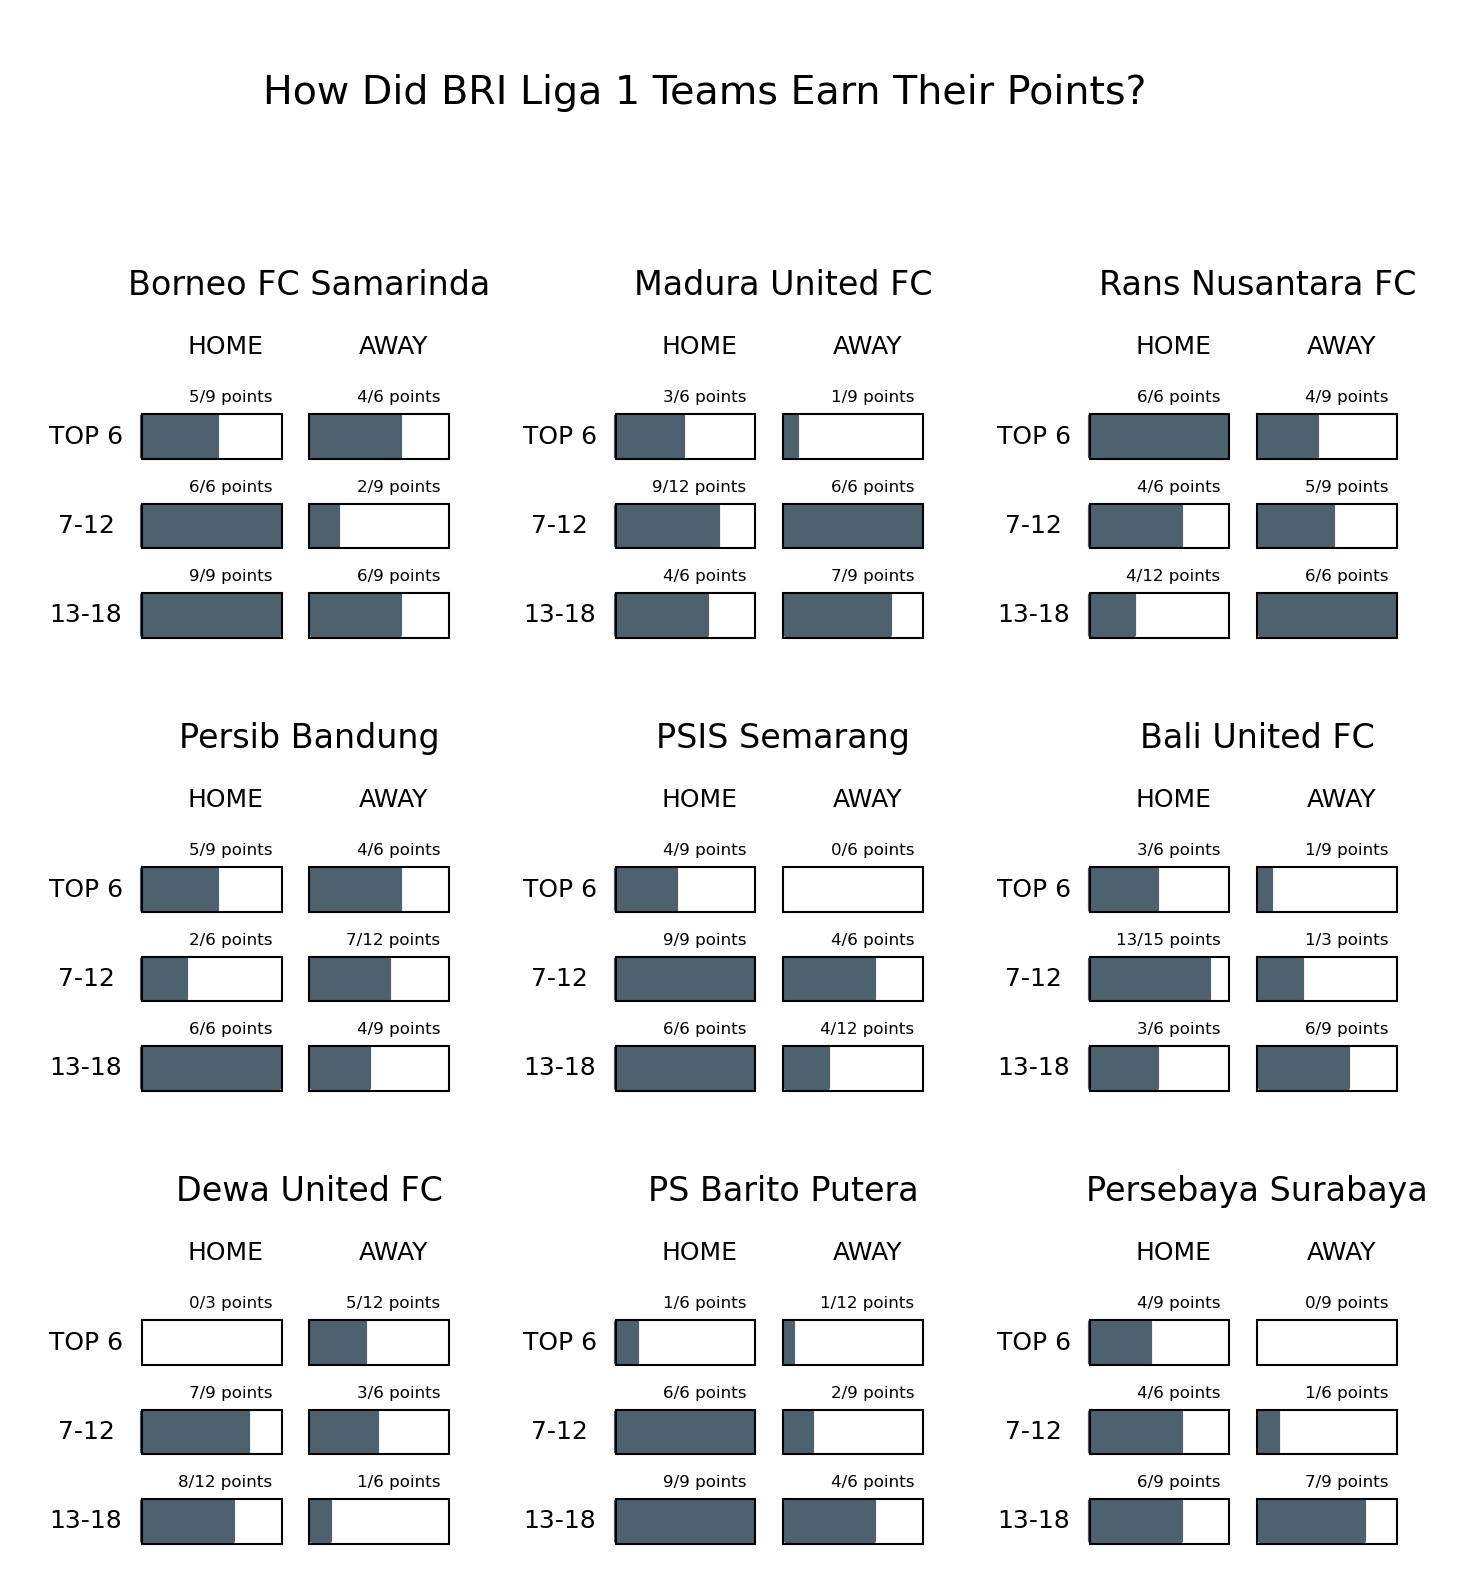

In [15]:
fig, ax = plt.subplots(3,3,figsize = (6,6), dpi=300)

plt.setp(ax, xlim=(0, 1), ylim=(0, 1))

plt.subplots_adjust(wspace=.06, hspace=0)

for axn, cl in zip (ax.flat, range(len(dct['club'][:9]))): #9,18
    
    axn.annotate(xy = (5/8,4/5), text = dct['club'][cl], ha = 'center', va = 'bottom', size = 8)
    axn.annotate(xy = (7/16,.7), text = "HOME", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (13/16,.7), text = "AWAY", ha = "center", va = "center", size = 6)

    axn.annotate(xy = (1/8,.5), text = "TOP 6", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (1/8,.3), text = "7-12", ha = "center", va = "center", size = 6)
    axn.annotate(xy = (1/8,.1), text = "13-18", ha = "center", va = "center", size = 6)
    
    for i, j in zip ([.45, .25, .05], [0, 1, 2]):
        
        # set length of bars
        homebar = dct['home'][cl]['point'][j] / (dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])
        fhomebar = dct['fhome'][cl]['point'][j] / (dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])
        awaybar = dct['away'][cl]['point'][j] / dct['away'][cl]['width'][j]
        
        # shade the bar only if total points at certain venue is not 0
        if (homebar != 0) & ((dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])!=0): 
            axn.fill_between(x = [1/4+(5/16)*fhomebar, 1/4+(5/16)*(fhomebar+homebar)-.005], 
                             y1 = i+.005, y2 = i+.1-.005, 
                             color = '#4e616e')
        
        if (fhomebar != 0) & ((dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])!=0):
            axn.fill_between(x = [1/4+.005, 1/4+(5/16)*fhomebar], 
                             y1 = i+.005, y2 = i+.1-.005, 
                             color = '#4e616e')
            
        if (awaybar != 0) & (dct['away'][cl]['width'][j]!=0):
            axn.fill_between(x = [5/8+.005, 5/8+(5/16)*awaybar-.005], 
                             y1 = i+.005, y2 = i+.1-.005, 
                             color = '#4e616e')
        
        # label home points earned
        axn.annotate(xy = ((1/4+5/16-.02), (i+.12)), 
                     text = (str(dct['home'][cl]['point'][j]+dct['fhome'][cl]['point'][j])+'/'+
                             str(dct['home'][cl]['width'][j]+dct['fhome'][cl]['width'][j])+' points'), 
                     ha = 'right', va = 'bottom', 
                     size = 4)
        
        # label away points earned
        axn.annotate(xy = ((5/8+5/16-.02), (i+.12)), 
                     text = str(dct['away'][cl]['point'][j])+'/'+str(dct['away'][cl]['width'][j])+' points', 
                     ha = 'right', va = 'bottom', 
                     size = 4)
        
        # draw edgeline
        for ix in [1/4,5/8]:
            axn.add_patch(patches.Rectangle((ix, i), 5/16, .1, facecolor="none", ec='k', lw=.5))
            
    # set aspect ratio
    axn.set(adjustable='box', aspect='equal')    
    # no axis
    axn.axis('off')

# add title
fig.suptitle("\nHow Did BRI Liga 1 Teams Earn Their Points?", size=9.5)